In [1986]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1987]:
aus_drinking_path = 'Ausdrinking.xls'
aus_drinking_litres = pd.read_excel(aus_drinking_path, 'Litres')
year = aus_drinking_litres["Years"].value_counts(ascending = False)
year.sort_index(inplace = True, ascending = False)

In [1988]:
aus_drinking_path = 'Ausdrinking.xls'
aus_drinking_capita = pd.read_excel(aus_drinking_path, 'Capita', index_col=0,)
aus_drinking_litres = pd.read_excel(aus_drinking_path, 'Litres', index_col=0,)
world_drinking = pd.read_csv('WorldAlcoholPerCapita.csv')
average = world_drinking["Alcohol"].mean()
aus_drinking_capita['Average'] = average 

Text(0, 0.5, "Litres Consumed ('000)")

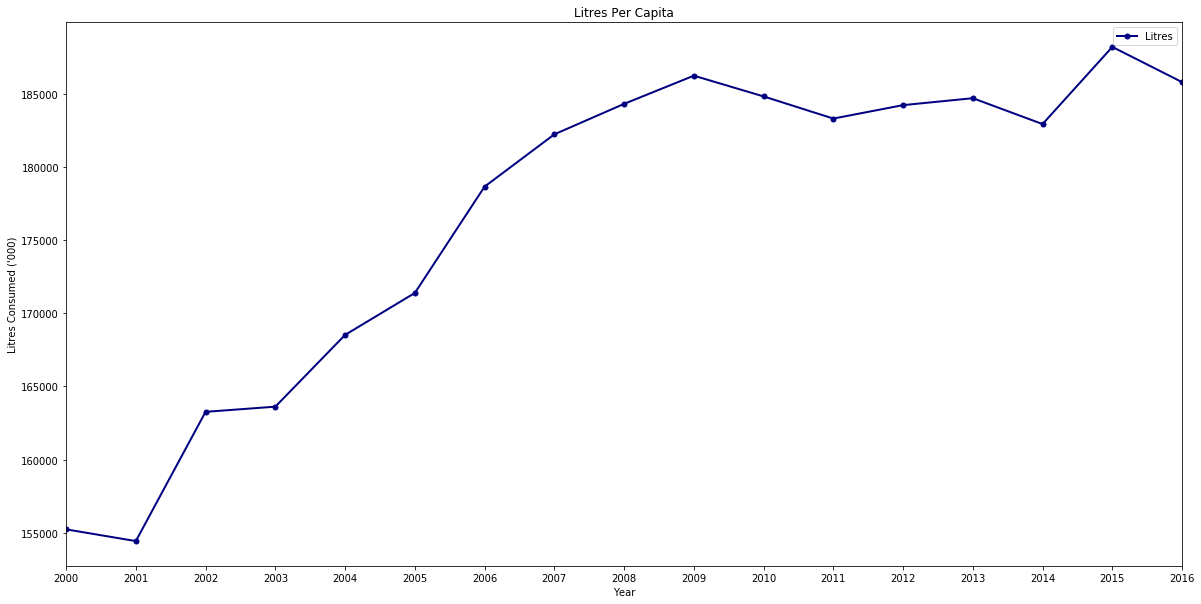

In [1989]:
plot = aus_drinking_litres.plot(title='Litres Per Capita', lw=2, colormap='jet', marker='.', markersize=10)
plot.locator_params(axis='x', nbins= base_num)
plot.set_xlabel("Year")
plot.set_ylabel("Litres Consumed ('000)")

Text(0, 0.5, 'Litres Per Capita')

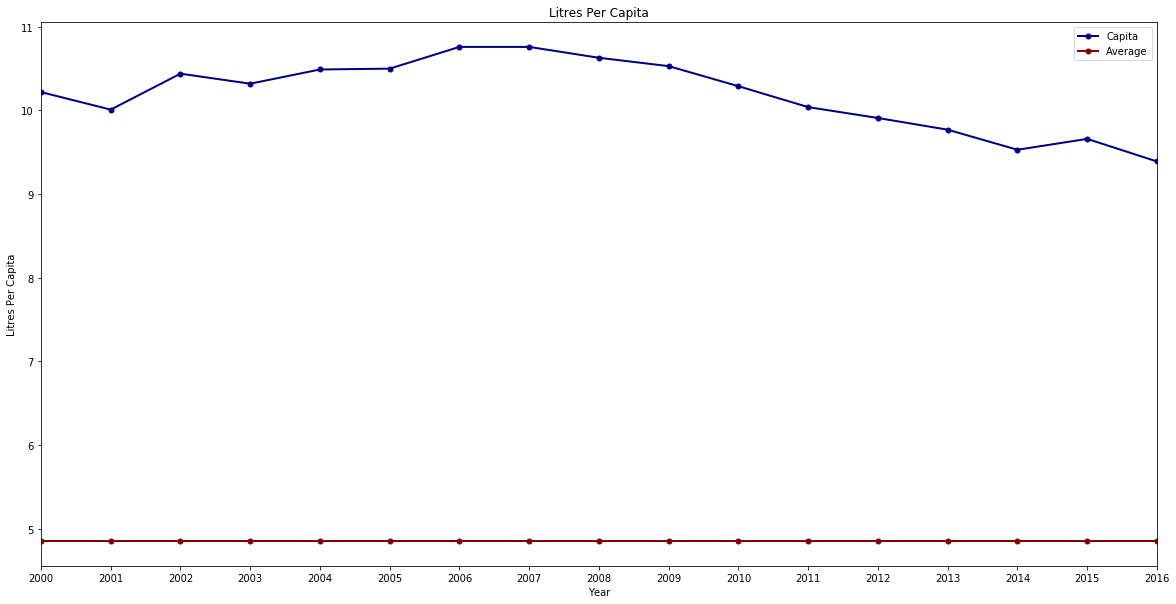

In [1990]:
plot = aus_drinking_capita.plot(title='Litres Per Capita', lw=2, colormap='jet', marker='.', markersize=10)
plot.locator_params(axis='x', nbins= base_num)
plot.set_xlabel("Year")
plot.set_ylabel("Litres Per Capita")

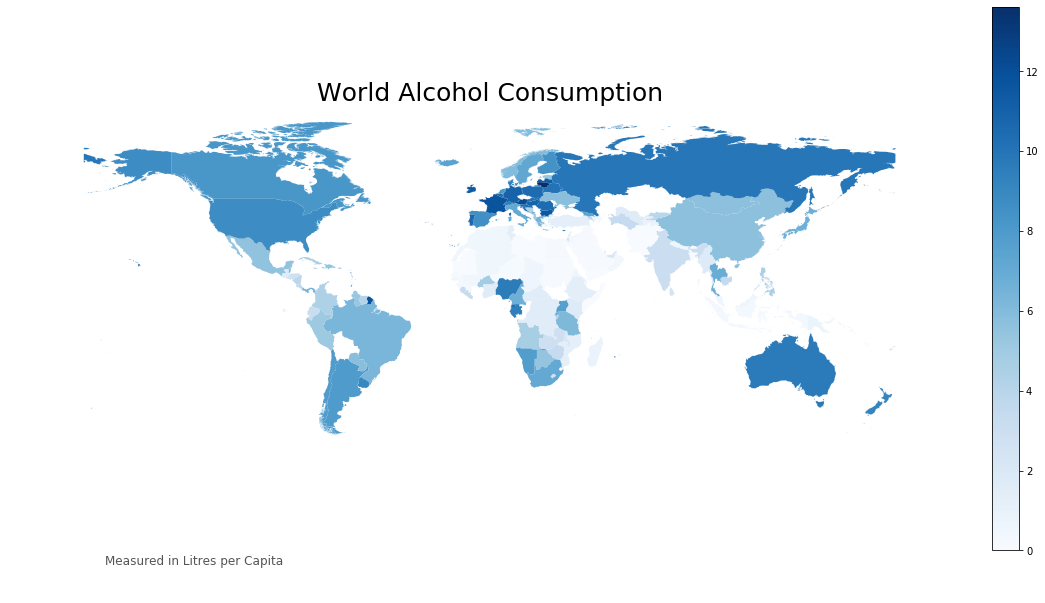

In [1991]:
world_drinking = pd.read_csv('WorldAlcoholPerCapita.csv',index_col=0,)
world_map = gp.read_file('countries.geojson')

world_drinking.head(10)

world_drinking = world_drinking[(world_drinking.Beverage == 'All types')]

merged = world_map.merge(world_drinking, left_on='ADMIN', right_on='Country')

merged.head()

ax = merged.dropna().plot(column='Alcohol', cmap='Blues', legend=True)
ax.set_title('World Alcohol Consumption', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Measured in Litres per Capita',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
ax.set_axis_off()

In [1992]:
#world_drinking.nlargest(24, 'Alcohol')

Text(0, 0.5, 'Country')

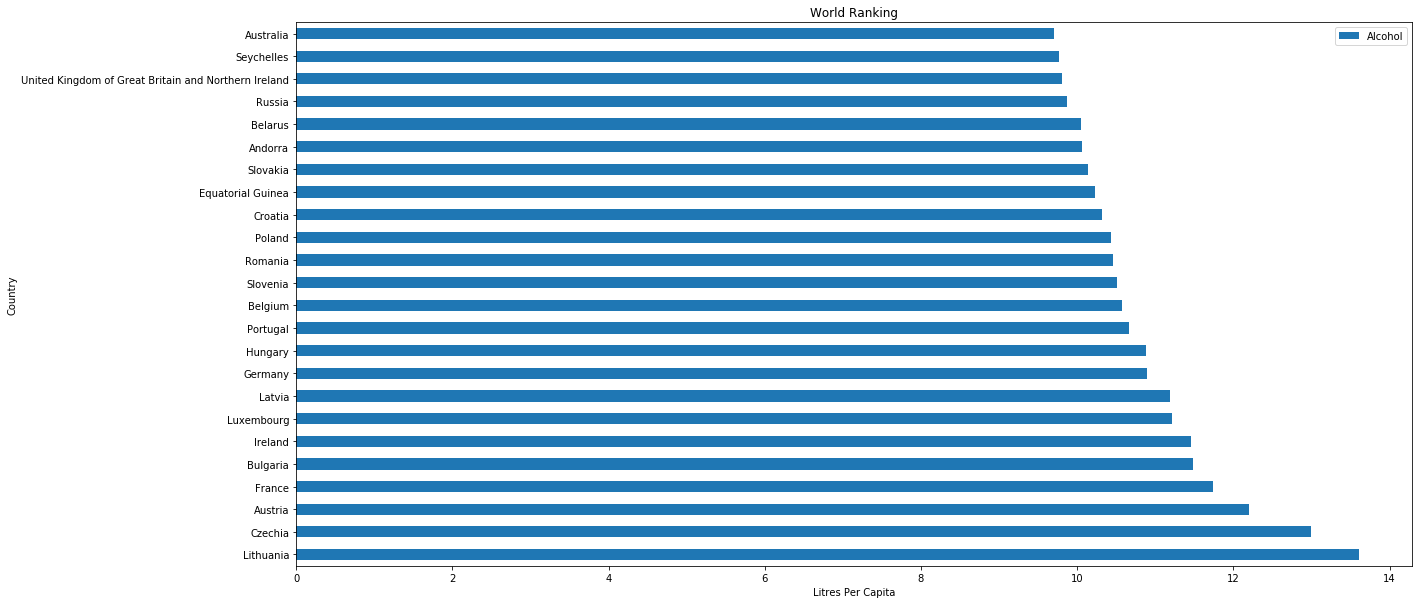

In [1993]:
# bar graph aus in context

world_rank = world_drinking.nlargest(24, 'Alcohol')

#world_rank.head()

plot = world_rank.plot.barh(title='World Ranking')
plot.set_xlabel("Litres Per Capita")
plot.set_ylabel("Country")

In [1994]:
# pie graph, types of dirnks

# graph nsw, sydney, city of sydney drinking rate?

In [1995]:
# graph nsw, sydney, city of sydney alcohol crime rate, before 2013

In [1996]:
shp_file_name = "NSW_LOCALITY_POLYGON_shp/NSW_LOCALITY_POLYGON_shp.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = ("https://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
                 "5e295412-357c-49a2-98d5-6caf099c2339/download/nsw_locality_polygon_shp.zip")

In [1997]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [1998]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [1999]:
# unzip shp file

if os.path.isfile(shp_file_name):
    print("")
else:
    if os.path.isfile(zip_file_name):
        print("")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("")

In [2000]:
# list suburbs for mapping

# maybe change to streets at later date, open street maps

burbs = gp.GeoDataFrame.from_file(shp_file_name)

def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

#burbs.drop(["NSW_LOCALI","DT_CREATE", "NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE", "NSW_LOCA_5", "NSW_LOCA_6", "NSW_LOCA_7"], axis=1, inplace=True)
#lockout_burbs = burbs[(burbs.NSW_LOCA_2 == 'SYDNEY')|(burbs.NSW_LOCA_2 == 'DAWES POINT')|(burbs.NSW_LOCA_2 == 'WOOLLOOMOOLOO')|(burbs.NSW_LOCA_2 == 'POTTS POINT')|(burbs.NSW_LOCA_2 == 'MILLERS POINT')|(burbs.NSW_LOCA_2 == 'POTTS POINT')|(burbs.NSW_LOCA_2 == 'THE ROCKS (SYD)')]
#lockout_burbs.head(10)

#Can't find the name for the rocks

In [2001]:
# centroid from lockout

def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

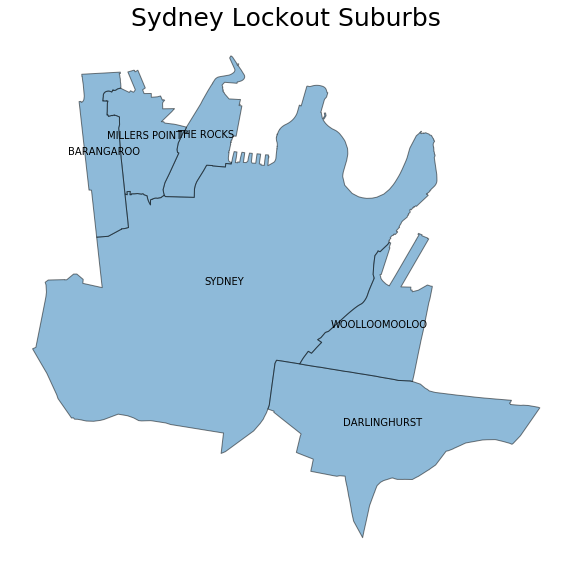

In [2002]:
sydney_centre = shapely.geometry.point.Point(151.2093318937477, -33.86885141291842)
burbs["distance_from_lockout"] = burbs.geometry.distance(sydney_centre)

close_lockout = burbs[burbs.distance_from_lockout<0.008]

ax = close_lockout.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_title('Sydney Lockout Suburbs', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_axis_off()

for idx, row in close_lockout.iterrows():
    plt.annotate(s=row.NSW_LOCA_2, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center')
    
#plt.title("Sydney Lockout Suburbs")


In [2003]:
nsw_alcohol_crime = pd.read_excel('Alcohol_Suburb_14_18.xls', 'Total')

nsw_alcohol_crime = nsw_alcohol_crime[(nsw_alcohol_crime.Alcohol == 'Alcohol Related ')]

In [2004]:
total_nsw = nsw_alcohol_crime[(nsw_alcohol_crime.Alcohol == 'Alcohol Related ')]

total_nsw = total_nsw[(total_nsw.Suburb == 'Total NSW')]

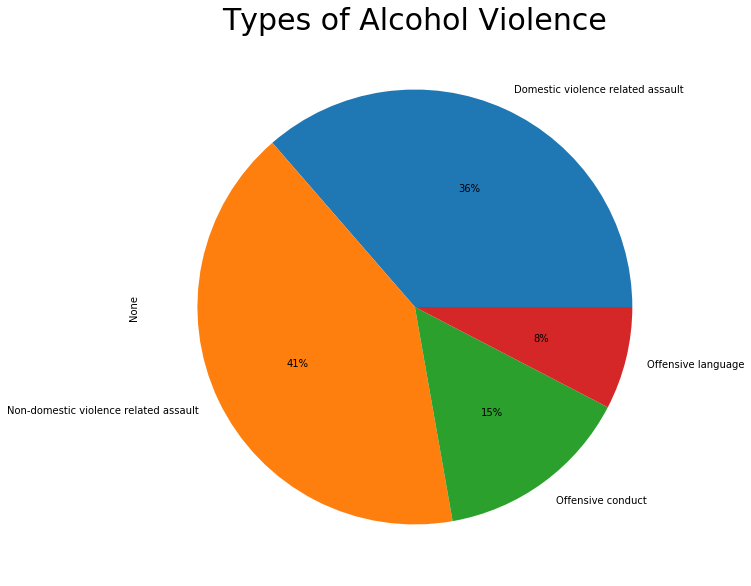

In [2005]:
# pie graph

total_pie = total_nsw.rename(index = {0: "Domestic violence related assault", 2:"Non-domestic violence related assault", 4:"Offensive conduct", 6:"Offensive language"}, inplace = True)
total_pie = total_nsw.sum(axis = 1, skipna = True) 

plt.title("Types of Alcohol Violence", fontsize = 30)

total_pie.plot.pie(figsize=(10, 10), autopct='%1.0f%%')

In [2006]:
lockout_crime = nsw_alcohol_crime[(nsw_alcohol_crime.Suburb == 'Sydney')|(nsw_alcohol_crime.Suburb == 'Dawes Point')|(nsw_alcohol_crime.Suburb == 'Woolloomooloo')|(nsw_alcohol_crime.Suburb == 'Potts Point')|(nsw_alcohol_crime.Suburb == 'Millers Point')|(nsw_alcohol_crime.Suburb == 'The Rocks (Sydney)')|(nsw_alcohol_crime.Suburb == 'Darlinghurst')]

lockout_crime.drop(["Offence", "Alcohol"], axis=1, inplace=True)

lockout_crime = lockout_crime.groupby(["Suburb"]).sum()

/Users/Charlie/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


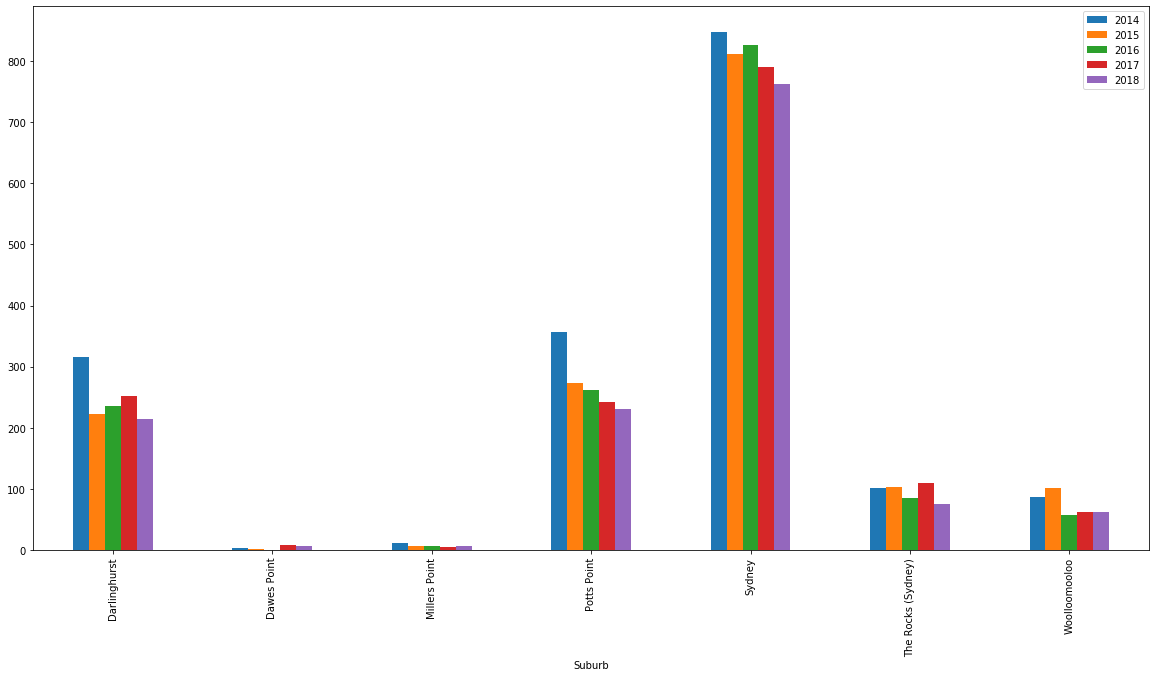

In [2007]:
lockout_crime_hist.plot.bar()

In [2008]:
lockout_crime = lockout_crime.groupby(["Suburb"]).sum().unstack(1)

lockout_crime.to_csv('lockout_crime_graph.csv')

lockout_crime_graph = pd.read_csv('lockout_crime_graph.csv', header=None)

lockout_crime_graph = lockout_crime_graph.rename(columns={0:'Year', 1:'Suburb', 2:'Close'})

/Users/Charlie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2009]:
lockout_crime_graph.groupby(['Year', 'Suburb']).sum()['Close'].unstack().plot(ax=ax, title = 'Close')
plt.show()

Text(0, 0.5, 'Incidents')

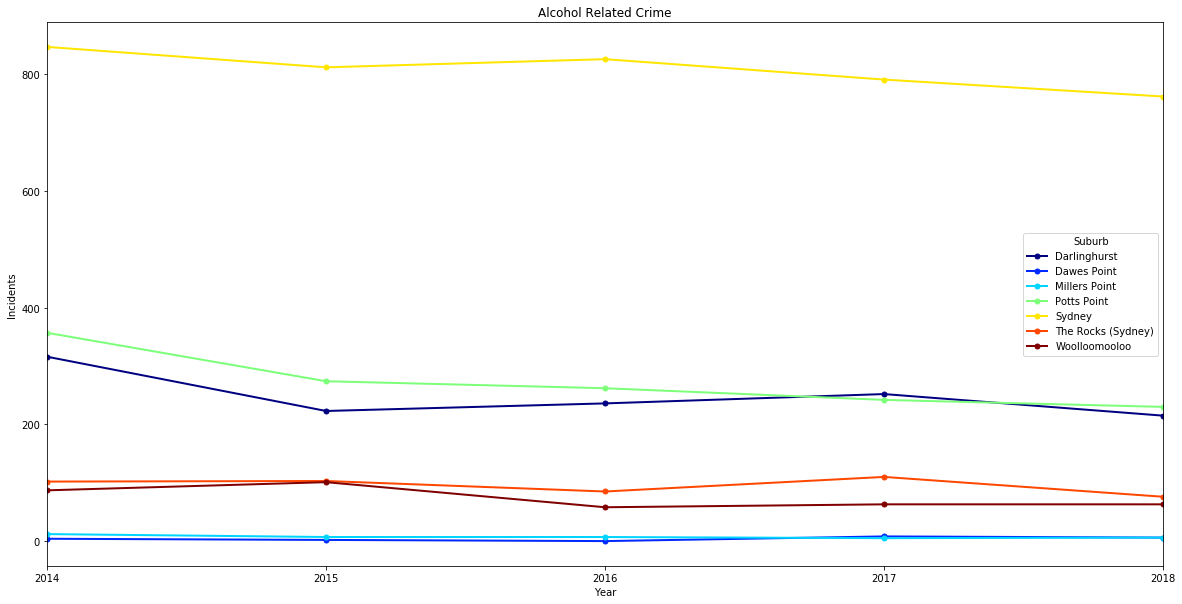

In [2010]:
plot = lockout_crime_graph.groupby(['Year', 'Suburb']).sum()['Close'].unstack().plot(title='Alcohol Related Crime', lw=2, colormap='jet', marker='.', markersize=10)
plot.locator_params(axis='x', nbins= 5)
plot.set_xlabel("Year")
plot.set_ylabel("Incidents")

In [2011]:
lockout_total = nsw_alcohol_crime[(nsw_alcohol_crime.Suburb == 'Sydney')|(nsw_alcohol_crime.Suburb == 'Dawes Point')|(nsw_alcohol_crime.Suburb == 'Woolloomooloo')|(nsw_alcohol_crime.Suburb == 'Potts Point')|(nsw_alcohol_crime.Suburb == 'Millers Point')|(nsw_alcohol_crime.Suburb == 'The Rocks (Sydney)')|(nsw_alcohol_crime.Suburb == 'Darlinghurst')]

lockout_total = lockout_total.groupby(["Suburb"]).sum()

lockout_total = lockout_total.sum()

Text(0, 0.5, 'Incidents')

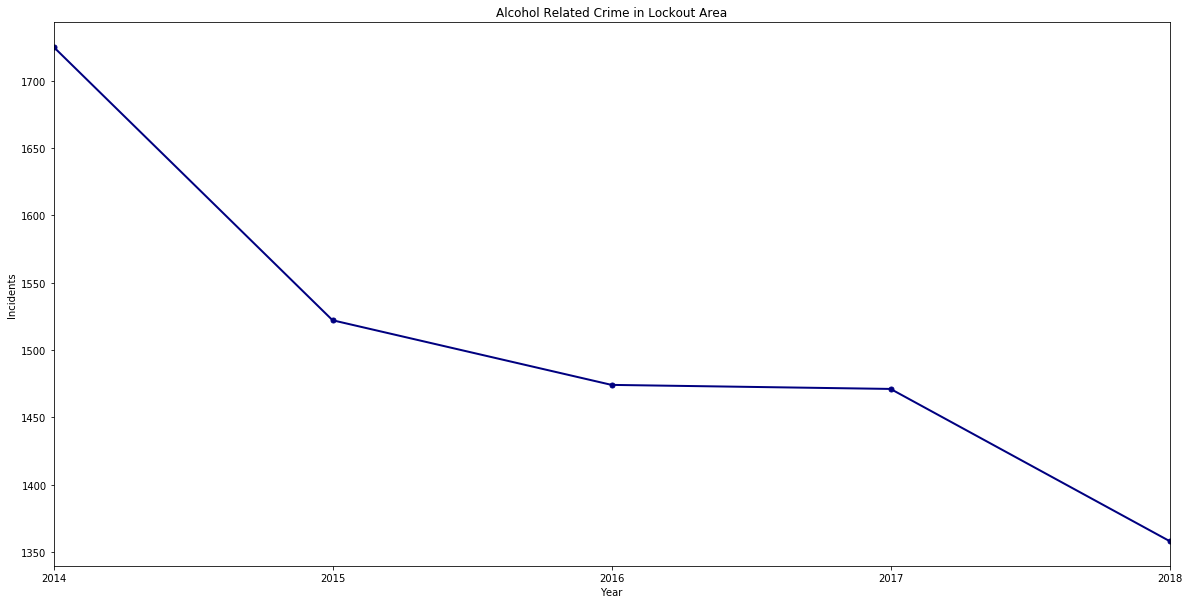

In [2012]:
plot = lockout_total.plot(title='Alcohol Related Crime in Lockout Area', lw=2, colormap='jet', marker='.', markersize=10)
plot.locator_params(axis='x', nbins= 5)
plot.set_xlabel("Year")
plot.set_ylabel("Incidents")

In [2013]:
nsw_alcohol_crime = pd.read_excel('Alcohol_Suburb_14_18.xls', 'Total')

total_nsw = nsw_alcohol_crime[(nsw_alcohol_crime.Alcohol == 'Alcohol Related ')]

total_nsw_graph = total_nsw[(total_nsw.Suburb == 'Total NSW')]

total_nsw_graph = total_nsw_graph.groupby(["Suburb"]).sum()

total_nsw_graph = total_nsw_graph.sum()

Text(0, 0.5, 'Incidents')

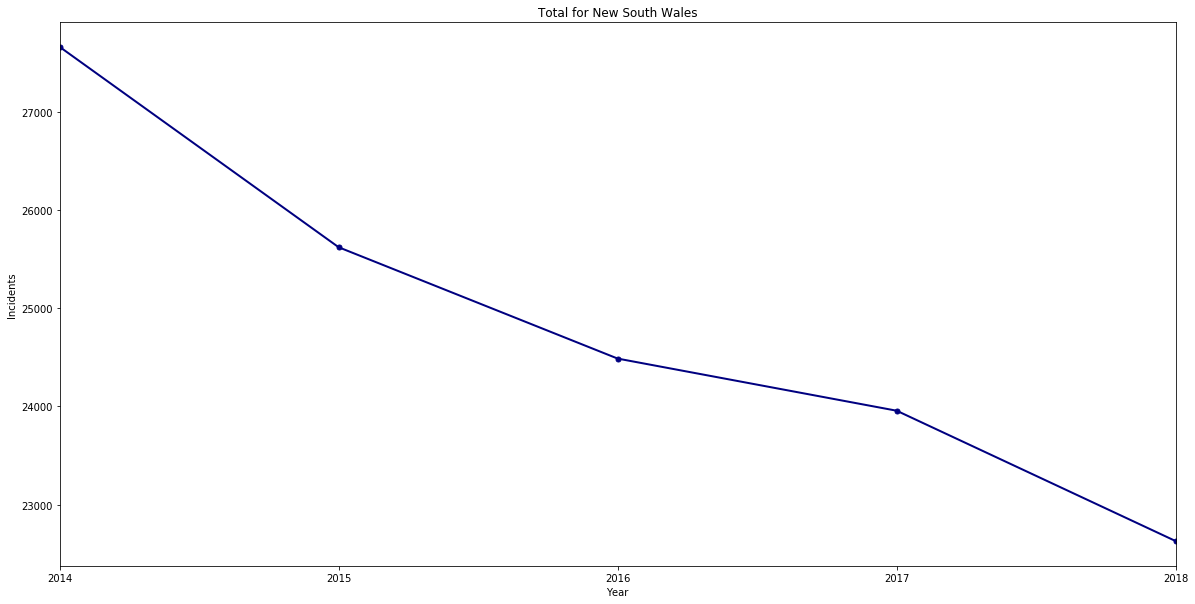

In [2014]:
plot = total_nsw_graph.plot(title='Total for New South Wales', lw=2, colormap='jet', marker='.', markersize=10)
plot.locator_params(axis='x', nbins= 5)
plot.set_xlabel("Year")
plot.set_ylabel("Incidents")

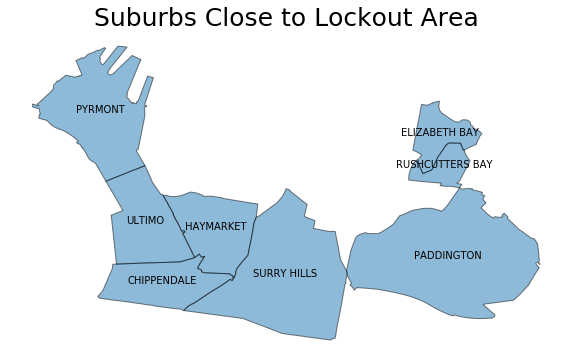

In [2015]:
close_lockout = burbs[burbs.distance_from_lockout<0.017]

close_lockout = burbs[(burbs.NSW_LOCA_2 == 'PYRMONT')|(burbs.NSW_LOCA_2 == 'ULTIMO')|(burbs.NSW_LOCA_2 == 'HAYMARKET')|(burbs.NSW_LOCA_2 == 'CHIPPENDALE')|(burbs.NSW_LOCA_2 == 'SURRY HILLS')|(burbs.NSW_LOCA_2 == 'PADDINGTON')|(burbs.NSW_LOCA_2 == 'ELIZABETH BAY')|(burbs.NSW_LOCA_2 == 'RUSHCUTTERS BAY')]

ax = close_lockout.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_title('Suburbs Close to Lockout Area', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_axis_off()

for idx, row in close_lockout.iterrows():
    plt.annotate(s=row.NSW_LOCA_2, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center')

In [2016]:
close_data = nsw_alcohol_crime[(nsw_alcohol_crime.Suburb == 'Pyrmont')|(nsw_alcohol_crime.Suburb == 'Ultimo')|(nsw_alcohol_crime.Suburb == 'Chippendale')|(nsw_alcohol_crime.Suburb == 'Haymarket')|(nsw_alcohol_crime.Suburb == 'Surry Hills')|(nsw_alcohol_crime.Suburb == 'Paddington')|(nsw_alcohol_crime.Suburb == 'Elizabeth Bay')|(nsw_alcohol_crime.Suburb == 'Rushcutters Bay')]

close_data.drop(["Offence", "Alcohol"], axis=1, inplace=True)

#close_data = close_lockout_data.groupby['Suburb']

#close_lockout_data.first()

close_data = close_data.groupby(["Suburb"]).sum()

close_data = close_data.groupby(["Suburb"]).sum().unstack(1)

#close_data = close_data.set_axis(1)

#close_data.set_index("Suburb", inplace=True)

close_data.head()

close_data.to_csv('close_data.csv')

close_burbs = pd.read_csv('close_data.csv', header=None)

/Users/Charlie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [2017]:
close_burbs = close_burbs.rename(columns={0:'Year', 1:'Suburb', 2:'Close'})

In [2018]:
close_burbs.groupby(['Year', 'Suburb']).sum()['Close'].unstack().plot(ax=ax, title = 'Close')
plt.show()

Text(0, 0.5, "Litres Consumed ('000)")

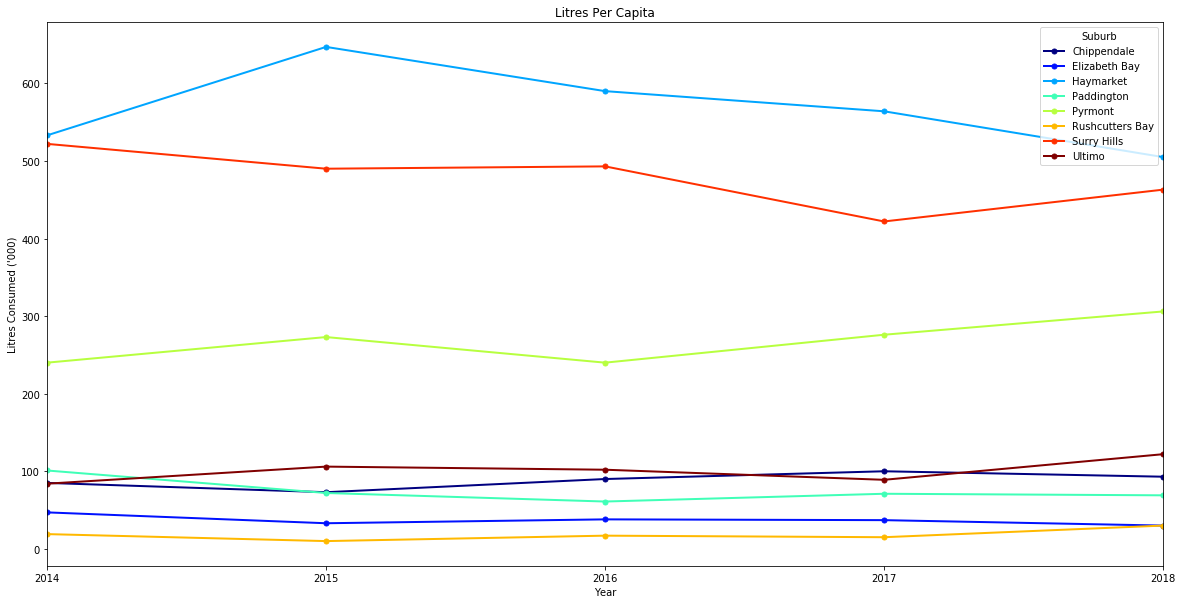

In [2019]:
plot = close_burbs.groupby(['Year', 'Suburb']).sum()['Close'].unstack().plot(title='Litres Per Capita', lw=2, colormap='jet', marker='.', markersize=10)
plot.locator_params(axis='x', nbins= 5)
plot.set_xlabel("Year")
plot.set_ylabel("Litres Consumed ('000)")

In [2020]:
close_data_total = nsw_alcohol_crime[(nsw_alcohol_crime.Suburb == 'Pyrmont')|(nsw_alcohol_crime.Suburb == 'Ultimo')|(nsw_alcohol_crime.Suburb == 'Chippendale')|(nsw_alcohol_crime.Suburb == 'Haymarket')|(nsw_alcohol_crime.Suburb == 'Surry Hills')|(nsw_alcohol_crime.Suburb == 'Paddington')|(nsw_alcohol_crime.Suburb == 'Elizabeth Bay')|(nsw_alcohol_crime.Suburb == 'Rushcutters Bay')]

close_data_total.drop(["Offence", "Alcohol"], axis=1, inplace=True)

close_data_total = close_data_total.groupby(["Suburb"]).sum()

close_data_total = close_data_total.sum()

Text(0, 0.5, 'Incidents')

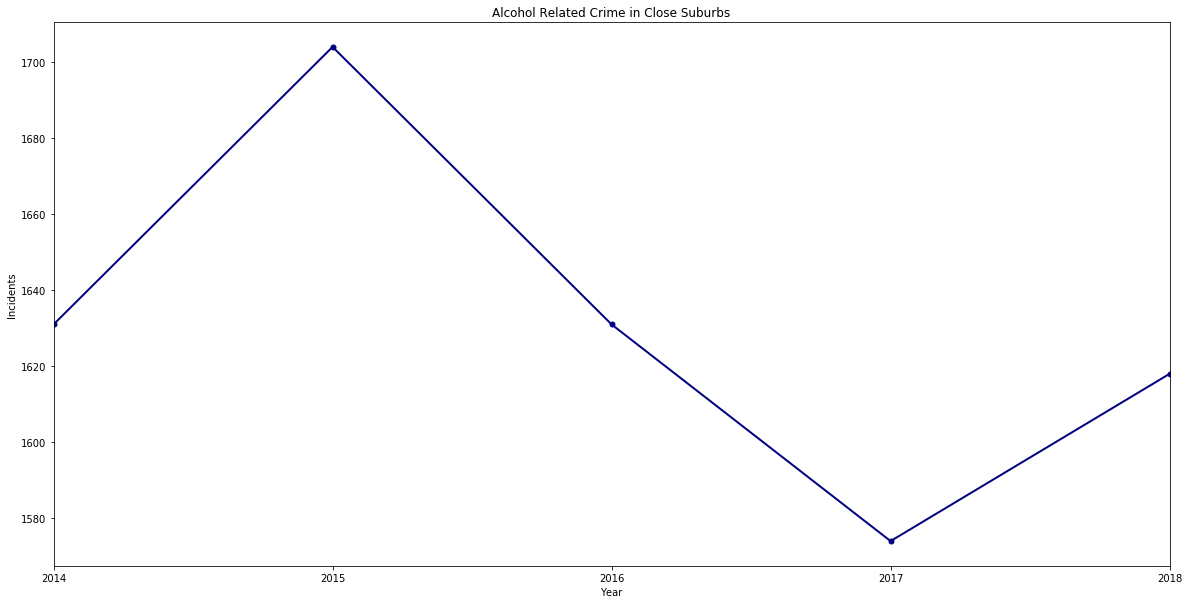

In [2021]:
plot = close_data_total.plot(title='Alcohol Related Crime in Close Suburbs', lw=2, colormap='jet', marker='.', markersize=10)
plot.locator_params(axis='x', nbins= 5)
plot.set_xlabel("Year")
plot.set_ylabel("Incidents")

In [2051]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)

nsw_alcohol_crime = pd.read_excel('Alcohol_Suburb_14_18.xls', 'Total')

nsw_alcohol_crime = nsw_alcohol_crime[(nsw_alcohol_crime.Alcohol == 'Alcohol Related ')]

burbs.drop(["NSW_LOCALI","LC_PLY_PID","LOC_PID", "DT_CREATE", "NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE", "NSW_LOCA_5", "NSW_LOCA_6", "NSW_LOCA_7"], axis=1, inplace=True)

sydney_centre = shapely.geometry.point.Point(151.2093318937477, -33.86885141291842)
burbs["distance_from_lockout"] = burbs.geometry.distance(sydney_centre)

burbs_closeby = burbs[burbs.distance_from_lockout<0.03]

nsw_alcohol_crime.drop(["Offence","Alcohol"], axis=1, inplace=True)

nsw_alcohol_crime['Suburb'] = nsw_alcohol_crime['Suburb'].str.upper()

merged_wide = burbs_closeby.merge(nsw_alcohol_crime, left_on='NSW_LOCA_2', right_on='Suburb')

merged_wide = merged_wide.groupby(["Suburb"]).sum()

high_crime = merged_wide.nlargest(20, 2014)

high_crime = high_crime.drop(['SYDNEY', 'POTTS POINT', 'DARLINGHURST', 'WOOLLOOMOOLOO'], axis=0)

high_crime = high_crime.drop("distance_from_lockout", axis=1)

high_crime = high_crime.head(10)

high_crime

,2014,2015,2016,2017,2018
Suburb,,,,,
HAYMARKET,288.0,329.0,290.0,278.0,218.0
SURRY HILLS,274.0,218.0,253.0,179.0,211.0
PYRMONT,165.0,202.0,169.0,174.0,198.0
REDFERN,152.0,134.0,140.0,109.0,119.0
WATERLOO,123.0,98.0,75.0,107.0,105.0
GLEBE,67.0,68.0,73.0,59.0,69.0
PADDINGTON,66.0,37.0,32.0,42.0,34.0
MOORE PARK,56.0,58.0,37.0,53.0,51.0
NORTH SYDNEY,56.0,56.0,56.0,63.0,32.0


In [2052]:
high_crime_graph = high_crime.groupby(["Suburb"]).sum()

high_crime_graph = high_crime_graph.groupby(["Suburb"]).sum().unstack(1)

high_crime_graph.to_csv('high_crime_graph')

high_crime_graph = pd.read_csv('high_crime_graph', header=None, index_col=0)

/Users/Charlie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [2053]:
high_crime_graph = high_crime_graph.rename(columns={0:'Year', 1:'Suburb', 2:'Close'})

In [2055]:
#high_crime_graph = high_crime_graph.groupby([0, 'Suburb']).sum()['Close'].unstack().plot(ax=ax, title = 'Close')
#plt.show()

#.plot(ax=ax, title = 'Close')

#['Close'].unstack().plot(ax=ax, title = 'Close')
#plt.show()
high_crime_graph

Text(0, 0.5, 'Incidents')

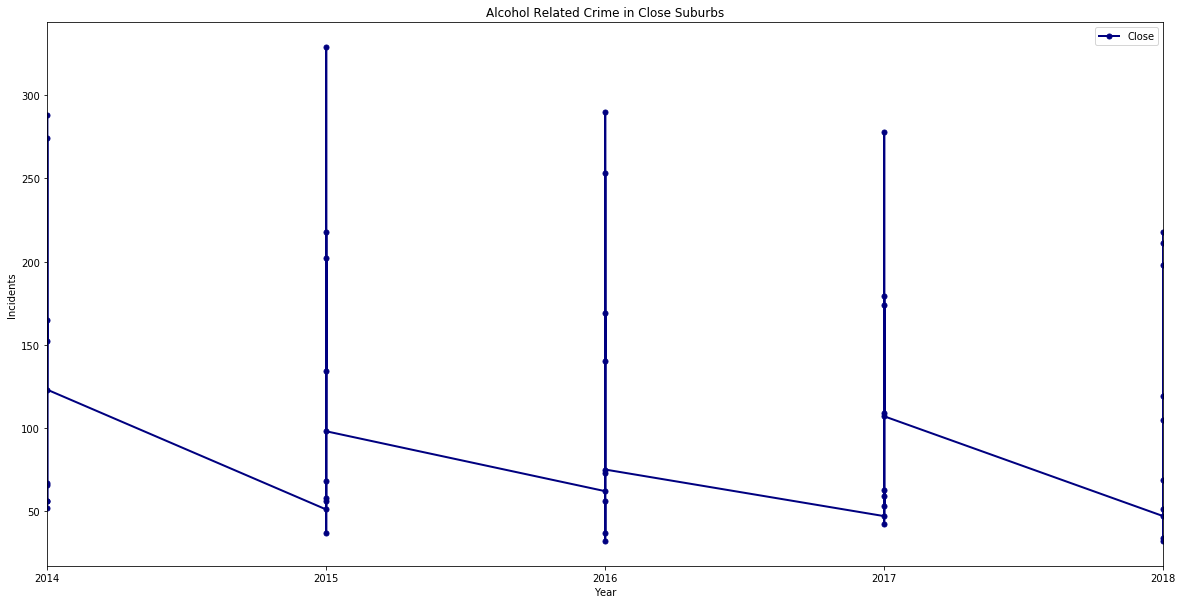

In [2026]:
plot = high_crime_graph.plot(title='Alcohol Related Crime in Close Suburbs', lw=2, colormap='jet', marker='.', markersize=10)
plot.locator_params(axis='x', nbins= 5)
plot.set_xlabel("Year")
plot.set_ylabel("Incidents")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a35c80278>,
      dtype=object)

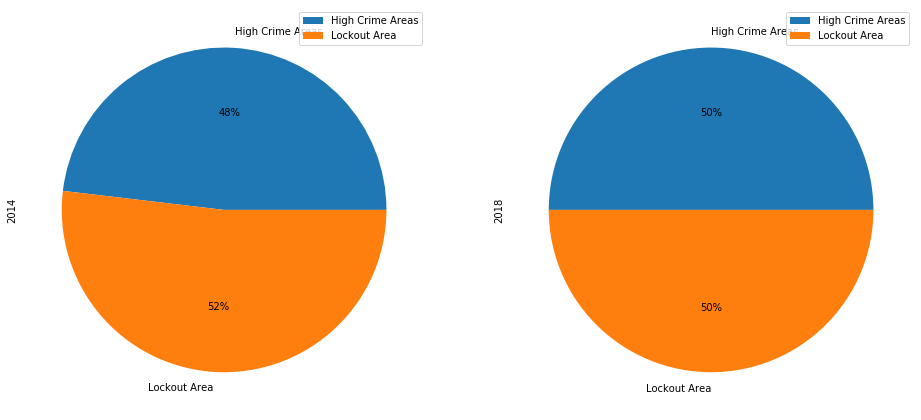

In [2027]:
high_crime_2014 = high_crime[2014].sum()

high_crime_2018 = high_crime[2018].sum()

lockout_area_2014 = lockout_area[2014].sum()

lockout_area_2018 = lockout_area[2018].sum()

lock_other_2014 = high_crime_2014, lockout_area_2014

lock_other_2018 = high_crime_2018, lockout_area_2018

#crime_pie = pd.DataFrame([1506,1623], index=['High Crime Areas', 'Lockout Area'], columns=[''])

#crime_pie.plot(kind='pie', subplots=True, figsize=(8, 8))

#crime_pie = pd.DataFrame([1282,1282], index=['High Crime Areas', 'Lockout Area'], columns=[''])

#crime_pie = pd.DataFrame({'2014', 'lock_other_2018'}, index=['High Crime Areas', 'Lockout Area'])

crime_pie = pd.DataFrame({'2014':[1506,1623], '2018':[1282,1282]}, index=['High Crime Areas', 'Lockout Area'] )


crime_pie.plot(kind='pie', subplots=True, figsize=(16,8), autopct='%1.0f%%')

In [2028]:
merged_wide = merged_wide.groupby(["Suburb"]).sum()

high_crime_2014 = merged_wide.nlargest(100, 2014)
high_crime_2015 = merged_wide.nlargest(100, 2015)
high_crime_2016 = merged_wide.nlargest(100, 2016)
high_crime_2017 = merged_wide.nlargest(100, 2017)
high_crime_2018 = merged_wide.nlargest(100, 2018)

high_crime_map_2014 = high_crime_2014.iloc[:, 1:2]
high_crime_map_2015 = merged_wide.iloc[:, 2:3]
high_crime_map_2016 = merged_wide.iloc[:, 3:4]
high_crime_map_2017 = merged_wide.iloc[:, 4:5]
high_crime_map_2018 = merged_wide.iloc[:, 5:6]

merged_2014 = burbs.merge(high_crime_map_2014, left_on='NSW_LOCA_2', right_on='Suburb')
merged_2015 = burbs.merge(high_crime_map_2015, left_on='NSW_LOCA_2', right_on='Suburb')
merged_2016 = burbs.merge(high_crime_map_2016, left_on='NSW_LOCA_2', right_on='Suburb')
merged_2017 = burbs.merge(high_crime_map_2017, left_on='NSW_LOCA_2', right_on='Suburb')
merged_2018 = burbs.merge(high_crime_map_2018, left_on='NSW_LOCA_2', right_on='Suburb')

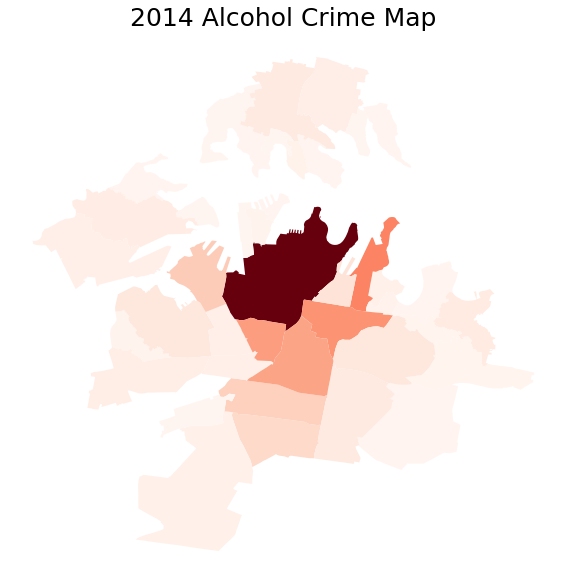

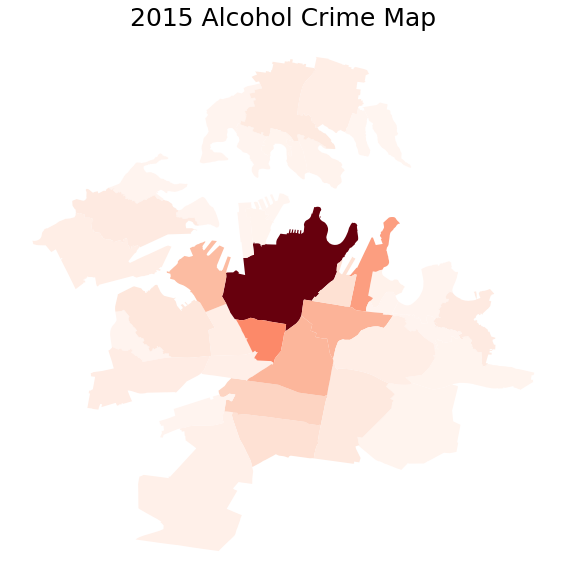

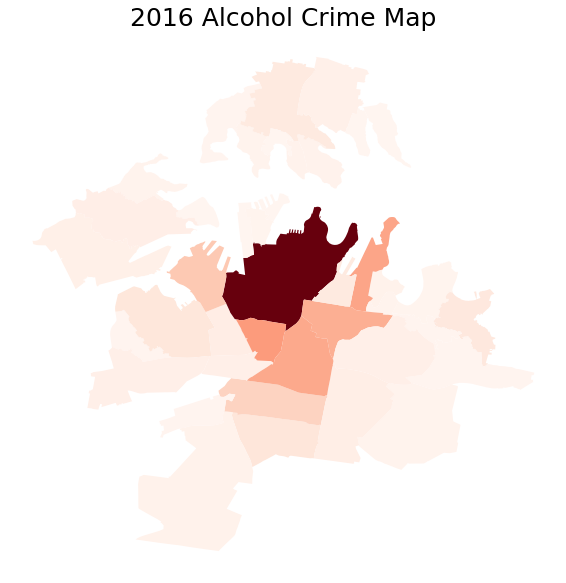

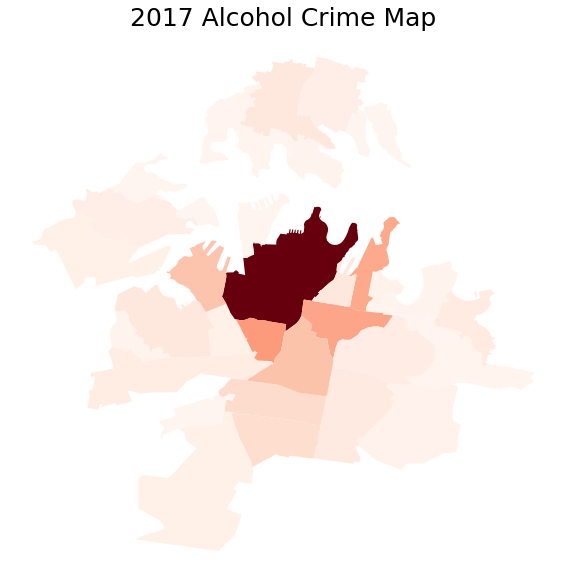

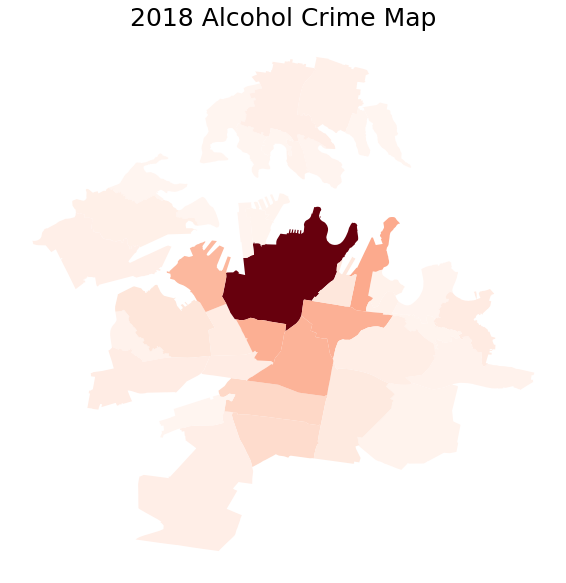

In [2029]:
ax = merged_2014.dropna().plot(column=2014, cmap='Reds', legend=False)
ax.set_title('2014 Alcohol Crime Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_axis_off()

ax = merged_2015.dropna().plot(column=2015, cmap='Reds', legend=False)
ax.set_title('2015 Alcohol Crime Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_axis_off()

ax = merged_2016.dropna().plot(column=2016, cmap='Reds', legend=False)
ax.set_title('2016 Alcohol Crime Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_axis_off()

ax = merged_2017.dropna().plot(column=2017, cmap='Reds', legend=False)
ax.set_title('2017 Alcohol Crime Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_axis_off()

ax = merged_2018.dropna().plot(column=2018, cmap='Reds', legend=False)
ax.set_title('2018 Alcohol Crime Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_axis_off()

In [2030]:
# show top spikes

nsw_alcohol_crime = pd.read_excel('Alcohol_Suburb_14_18.xls', 'Total')

nsw_alcohol_crime = nsw_alcohol_crime[(nsw_alcohol_crime.Alcohol == 'Alcohol Related ')]

high_crime = nsw_alcohol_crime.nlargest(20, 2014)

high_crime = high_crime.groupby(["Suburb"]).sum()

#high_crime = high_crime.drop[(nsw_alcohol_crime.Suburb == 'Pyrmont'),  axis=1)]

merged_crime.head(15)

high_crime_graph = high_crime[(high_crime.Suburb == 'Byron Bay')|(nsw_alcohol_crime.Suburb == 'Coffs Harbour')|(nsw_alcohol_crime.Suburb == 'Haymarket')|(nsw_alcohol_crime.Suburb == 'Manly')|(nsw_alcohol_crime.Suburb == 'Newtown')|(nsw_alcohol_crime.Suburb == 'The Rocks (Sydney)')|(nsw_alcohol_crime.Suburb == 'Darlinghurst')]


AttributeError: 'DataFrame' object has no attribute 'Suburb'

In [ ]:
# map gif bigger range in syd

output_path = 'Maps'

i = 0

list_of_years = ['2014','2015','2016','2017','2018']

In [ ]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)

nsw_alcohol_crime = pd.read_excel('Alcohol_Suburb_14_18.xls', 'Total')

nsw_alcohol_crime = nsw_alcohol_crime[(nsw_alcohol_crime.Alcohol == 'Alcohol Related ')]

burbs.drop(["NSW_LOCALI","LC_PLY_PID","LOC_PID", "DT_CREATE", "NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE", "NSW_LOCA_5", "NSW_LOCA_6", "NSW_LOCA_7"], axis=1, inplace=True)

sydney_centre = shapely.geometry.point.Point(151.2093318937477, -33.86885141291842)
burbs["distance_from_lockout"] = burbs.geometry.distance(sydney_centre)

burbs_closeby = burbs[burbs.distance_from_lockout<0.03]

nsw_alcohol_crime.drop(["Offence","Alcohol"], axis=1, inplace=True)

nsw_alcohol_crime['Suburb'] = nsw_alcohol_crime['Suburb'].str.upper()

merged_crime = burbs_closeby.merge(nsw_alcohol_crime, left_on='NSW_LOCA_2', right_on='Suburb')

merged_crime.to_csv('merged_crime.csv')

#merged_crime = merged_crime.groupby(["Suburb"]).sum()

merged_crime.head()

In [ ]:
merged_crime.columns

#ax = merged_crime.dropna().plot(column=2014, cmap='Blues', legend=True)
#ax.set_title('World Alcohol Consumption', fontdict={'fontsize': '25', 'fontweight' : '3'})
#ax.annotate('Measured in Litres per Capita',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
#ax.set_axis_off()

In [ ]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)

nsw_alcohol_crime = pd.read_excel('Alcohol_Suburb_14_18.xls', 'Total')

nsw_alcohol_crime = nsw_alcohol_crime[(nsw_alcohol_crime.Alcohol == 'Alcohol Related ')]

burbs.drop(["NSW_LOCALI","LC_PLY_PID","LOC_PID", "DT_CREATE", "NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE", "NSW_LOCA_5", "NSW_LOCA_6", "NSW_LOCA_7"], axis=1, inplace=True)

sydney_centre = shapely.geometry.point.Point(151.2093318937477, -33.86885141291842)
burbs["distance_from_lockout"] = burbs.geometry.distance(sydney_centre)

burbs_closeby = burbs[burbs.distance_from_lockout<0.05]

nsw_alcohol_crime.drop(["Offence","Alcohol"], axis=1, inplace=True)

nsw_alcohol_crime['Suburb'] = nsw_alcohol_crime['Suburb'].str.upper()

merged_crime = burbs_closeby.merge(nsw_alcohol_crime, left_on='NSW_LOCA_2', right_on='Suburb')

merged_crime.to_csv('merged_crime.csv')

#merged_crime = merged_crime.groupby(["Suburb"]).sum()

merged_crime.head()

In [ ]:
vmin, vmax = 200, 1200

for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = merged_crime_sydney.plot(column=int(year), cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('maps', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, only_year+'_violence.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [ ]:
# create an annotation for the year by grabbing the first 4 digits
    only_year = year[:4]
    # position the annotation to the bottom left
    fig.annotate(only_year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)

In [ ]:
for i in *.png; do sips -s format jpeg -s formatOptions 70 "${i}" --out "${i%png}jpg"; done